In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from globalVariables import *
import simpleCNNwithInception as inceptionCNN
import simpleCNN as simpleCNN
import simpleCNNwithInceptionRegression as regressor
from keras.callbacks import CSVLogger
from scipy.ndimage import rotate
import glob as glob
from getSIDMdata_generator import get_tf_DataSet as getGenerators

Objectives
----------
1. To see if changing the normalisation of the data makes a difference.

Conclusions
-----------



#### 1. Get the fiducial

In [8]:
data_files = ["pickles/rebinned_data_20_sigma_crit.pkl","pickles/allSimData_binning_20.pkl","pickles/allSimData_binning_20_mean.pkl"]
models = []
for iFile in data_files:
    
    training_set, test_set  = \
          getGenerators(augment_data=True, simulationNames=['CDM','SIDM0.1','SIDM1'], 
                                        channels=['total','stellar','xray'], allDataFile=iFile )
    
    epochs=80
    two_channel_model = simpleCNN.getModel_ds(3)

    au_history = two_channel_model.fit(
      x=training_set,
        validation_data=test_set,
      epochs=epochs
    )
    models.append( two_channel_model )
    
savethese = [ i.history.history for i in models ]
pkl.dump(savethese, open("pickles/renorm_test.pkl","wb"))

Epoch 1/80


2023-06-15 15:59:11.103222: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


90/90 [==============================] - 22s 238ms/step - loss: 0.9927 - accuracy: 0.4767 - val_loss: 0.8392 - val_accuracy: 0.5875
Epoch 2/80
90/90 [==============================] - 21s 230ms/step - loss: 0.7309 - accuracy: 0.6542 - val_loss: 0.7184 - val_accuracy: 0.6667
Epoch 3/80
90/90 [==============================] - 20s 223ms/step - loss: 0.6886 - accuracy: 0.6674 - val_loss: 0.6695 - val_accuracy: 0.6917
Epoch 4/80
90/90 [==============================] - 21s 232ms/step - loss: 0.6097 - accuracy: 0.7191 - val_loss: 0.7740 - val_accuracy: 0.6556
Epoch 5/80
90/90 [==============================] - 20s 228ms/step - loss: 0.6007 - accuracy: 0.7264 - val_loss: 0.6526 - val_accuracy: 0.7042
Epoch 6/80
90/90 [==============================] - 21s 231ms/step - loss: 0.5655 - accuracy: 0.7344 - val_loss: 0.6387 - val_accuracy: 0.7125
Epoch 7/80
90/90 [==============================] - 21s 237ms/step - loss: 0.5798 - accuracy: 0.7323 - val_loss: 0.6260 - val_accuracy: 0.7153
Epoch 8/80

#### Results

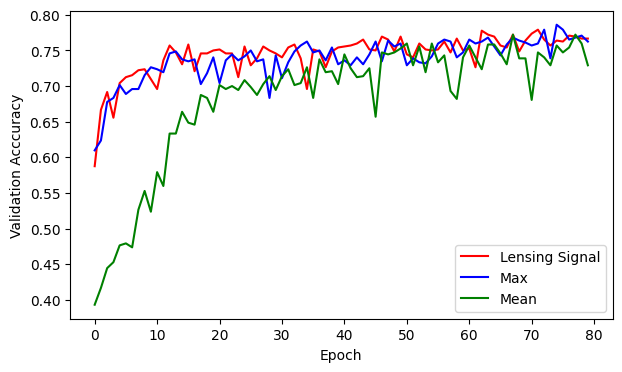

In [10]:
plt.figure(figsize=(7,4))
plt.xlabel('Epoch')
plt.ylabel('Validation Acccuracy')
models = pkl.load(open("pickles/renorm_test.pkl","rb"))
c = ['r','b','g','c','y','k']
name=['Lensing Signal','Max','Mean']
for i, iModel in enumerate(models):
    plt.plot(np.arange(len(iModel['val_accuracy'])), iModel['val_accuracy'], label=name[i], c=c[i])
    #plt.plot(iModel.history.epoch, [np.max(iModel.history.history['val_accuracy'])]*len(iModel.history.epoch), c=c[i])
    #print(np.max(iModel.history.history['val_accuracy']))

plt.legend()
plt.savefig("../plots/renorm_test.pdf")